In [1]:
!pip install numpy
!pip install matplotlib
!pip install keras
!pip install tensorflow
!pip install wandb
!pip install patchify
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 85.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 853.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
patchify 0.2.3 requires numpy<2,>=1, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [2]:
!pip install gradio

In [3]:
import os #to access the folders
import cv2 #to read the images
from PIL import Image #for images (basically to convert the numpy array to image)
import numpy as np
from patchify import patchify
from matplotlib import pyplot as plt
import random

In [4]:
from keras import backend as K

In [5]:
def jaccard_coef(y_true,y_pred):
  y_true_flatten=K.flatten(y_true)
  y_pred_flatten=K.flatten(y_pred)
  intersection=K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value=intersection/(K.sum(y_true_flatten)+K.sum(y_pred_flatten)-intersection+1.0)
  return final_coef_value

In [6]:
weights=[0.166,0.166,0.166,0.166,0.166,0.166]

In [7]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Class weights (6 classes)
class_weights = tf.constant([0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666], dtype=tf.float32)

# Dice Loss
def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Categorical Focal Loss
def categorical_focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
    cross_entropy = -y_true * K.log(y_pred)
    weight = alpha * K.pow(1 - y_pred, gamma)
    loss = weight * cross_entropy
    return K.sum(loss, axis=-1)

# Total loss (Dice + Focal)
def total_loss(y_true, y_pred):
    return dice_loss(y_true, y_pred) + categorical_focal_loss(y_true, y_pred)


In [8]:
!ls -lah

total 16K
drwxr-xr-x 1 root root 4.0K Sep 16 13:40 .
drwxr-xr-x 1 root root 4.0K Sep 18 17:42 ..
drwxr-xr-x 4 root root 4.0K Sep 16 13:40 .config
drwxr-xr-x 1 root root 4.0K Sep 16 13:40 sample_data


In [9]:
!ls -lah

total 16K
drwxr-xr-x 1 root root 4.0K Sep 16 13:40 .
drwxr-xr-x 1 root root 4.0K Sep 18 17:42 ..
drwxr-xr-x 4 root root 4.0K Sep 16 13:40 .config
drwxr-xr-x 1 root root 4.0K Sep 16 13:40 sample_data


In [13]:
from keras.models import load_model

satellite_model = load_model('/content/satellite_segmentation_model.keras',
                         custom_objects={'total_loss': total_loss,
                                         'jaccard_coef': jaccard_coef})

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 48 variables whereas the saved optimizer has 94 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
#satellite_model .get_config()

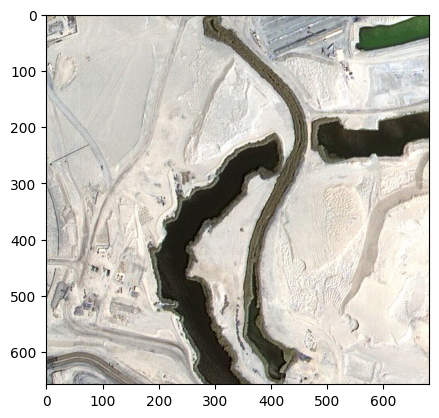

In [19]:
plt.imshow(Image.open("/content/my_image3.jpg"))

In [20]:
from PIL import Image
import numpy as np

image = Image.open('/content/my_image3.jpg')
image = image.resize((256, 256))
image = np.array(image)
image = np.expand_dims(image, 0)  # add batch dimension



In [21]:
prediction=satellite_model.predict(image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [22]:
           # shape (1,256,256,n_classes)
predicted_image = np.argmax(prediction, axis=3)[0] # shape (256,256)
print(predicted_image.shape)


(256, 256)


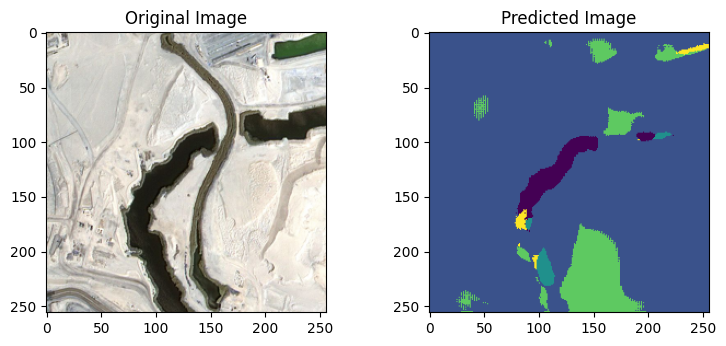

In [23]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
image_to_plot = image[0]  # shape becomes (256, 256, 3)
plt.imshow(image_to_plot)
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [24]:
import gradio as gr

In [25]:

def process_input_image(image_source):
  image=image_source
  image = image.resize((256, 256))
  image = np.array(image)
  image = np.expand_dims(image, 0)
  prediction=satellite_model.predict(image)
  predicted_image = np.argmax(prediction, axis=3)
  predicted_image=predicted_image[0,:,:]#the output is taken as number
  predicted_image=predicted_image*50
  return 'Predicted Masked Image', predicted_image

In [26]:
my_app = gr.Blocks()
with my_app:
  gr.Markdown("Statellite Image Segmentation Application UI with Gradio")
  with gr.Tabs():
    with gr.TabItem("Select your image"):
      with gr.Row():
        with gr.Column():
            img_source = gr.Image(label="Please select source Image",type='pil')
            source_image_loader = gr.Button("Load above Image")
        with gr.Column():
            output_label = gr.Label(label="Image Info")
            img_output = gr.Image(label="Image Output")
    source_image_loader.click(
        process_input_image,
        [
            img_source
        ],
        [
            output_label,
            img_output
        ]
    )

In [ ]:
my_app.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://92bbfd3a18fbeecb61.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
